# implement different pooling layers using TensorFlow's Keras API to understand their effects

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a Sample Feature Map
# Sample feature map: 4x4
feature_map = np.array([
    [1, 3, 2, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
], dtype=np.float32)

# Reshape to match TensorFlow's expected input shape: (batch_size, height, width, channels)
feature_map = feature_map.reshape((1, 4, 4, 1))

In [3]:
# Define Pooling Layers

# We'll define max pooling, average pooling, and global max pooling layers.
# Max Pooling
max_pool = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid')

# Average Pooling
avg_pool = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid')

# Global Max Pooling
global_max_pool = tf.keras.layers.GlobalMaxPooling2D()

# Global Average Pooling
global_avg_pool = tf.keras.layers.GlobalAveragePooling2D()

In [4]:
# Apply Max Pooling
max_pooled = max_pool(feature_map).numpy().squeeze()
print("Max Pooled Feature Map:\n", max_pooled)

# Apply Average Pooling
avg_pooled = avg_pool(feature_map).numpy().squeeze()
print("\nAverage Pooled Feature Map:\n", avg_pooled)

# Apply Global Max Pooling
global_max_pooled = global_max_pool(feature_map).numpy()
print("\nGlobal Max Pooled Feature Map:", global_max_pooled)

# Apply Global Average Pooling
global_avg_pooled = global_avg_pool(feature_map).numpy()
print("Global Average Pooled Feature Map:", global_avg_pooled)

Max Pooled Feature Map:
 [[ 6.  8.]
 [14. 16.]]

Average Pooled Feature Map:
 [[ 3.75  5.25]
 [11.5  13.5 ]]

Global Max Pooled Feature Map: [[16.]]
Global Average Pooled Feature Map: [[8.5]]


Output Explanation:

Max Pooling: Extracts the maximum value from each 2x2 window.
Average Pooling: Computes the average of each 2x2 window.
Global Max Pooling: Selects the maximum value across the entire feature map.
Global Average Pooling: Computes the average of all values in the feature map.

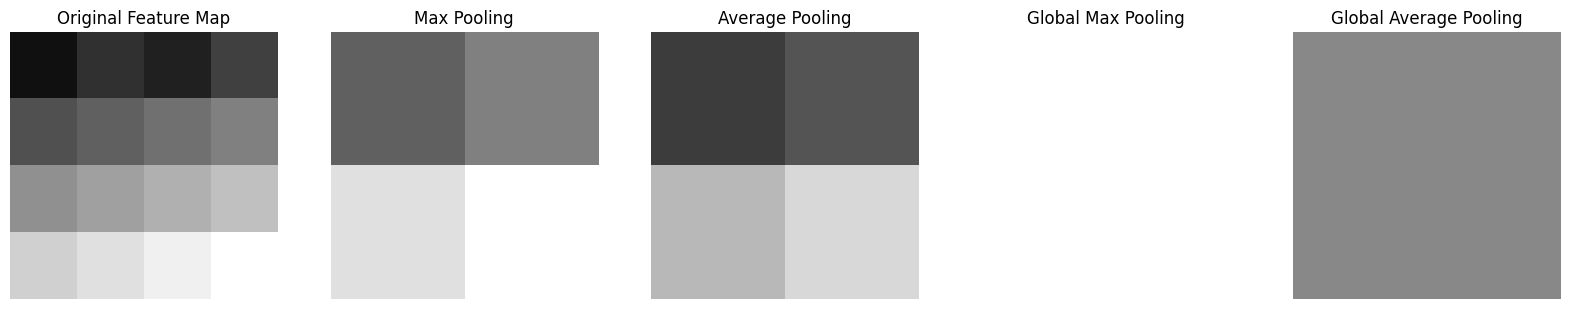

In [5]:
# Original Feature Map
fig, axs = plt.subplots(1, 5, figsize=(20, 4))

# Remove .numpy() as feature_map is already a numpy array
axs[0].imshow(feature_map.squeeze(), cmap='gray', vmin=0, vmax=16)  
axs[0].set_title('Original Feature Map')
axs[0].axis('off')

# Max Pooled
axs[1].imshow(max_pooled, cmap='gray', vmin=0, vmax=16)
axs[1].set_title('Max Pooling')
axs[1].axis('off')

# Average Pooled
axs[2].imshow(avg_pooled, cmap='gray', vmin=0, vmax=16)
axs[2].set_title('Average Pooling')
axs[2].axis('off')

# Global Max Pooled
# Reshape global_max_pooled to (1, 1) for imshow
axs[3].imshow(global_max_pooled.reshape(1, 1), cmap='gray', vmin=0, vmax=16)  
axs[3].set_title('Global Max Pooling')
axs[3].axis('off')

# Global Average Pooled
# Reshape global_avg_pooled to (1, 1) for imshow
axs[4].imshow(global_avg_pooled.reshape(1, 1), cmap='gray', vmin=0, vmax=16) 
axs[4].set_title('Global Average Pooling')
axs[4].axis('off')

plt.show()

# Implementing a CNN for Image Classification

Training data shape: (50000, 32, 32, 3), Training labels shape: (50000, 10)
Test data shape: (10000, 32, 32, 3), Test labels shape: (10000, 10)


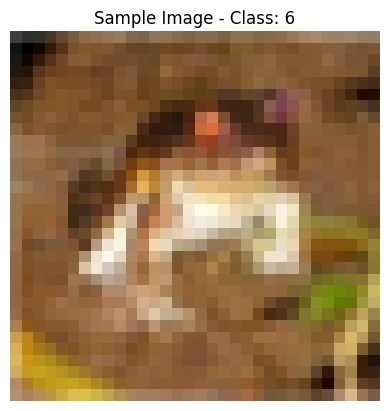

In [10]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# One-hot encode labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Verify the data
print(f"Training data shape: {train_images.shape}, Training labels shape: {train_labels.shape}")
print(f"Test data shape: {test_images.shape}, Test labels shape: {test_labels.shape}")

# Visualize a sample image
plt.imshow(train_images[0])
plt.title("Sample Image - Class: " + str(tf.argmax(train_labels[0]).numpy()))
plt.axis('off')
plt.show()

In [11]:
from tensorflow.keras import layers, models

# Define the CNN architecture
def create_cnn_model():
    model = models.Sequential()
    
    # Convolutional Layer 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    # Pooling Layer 1
    model.add(layers.MaxPooling2D((2, 2), strides=2))
    
    # Convolutional Layer 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    # Pooling Layer 2
    model.add(layers.MaxPooling2D((2, 2), strides=2))
    
    # Convolutional Layer 3
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    # Pooling Layer 3
    model.add(layers.MaxPooling2D((2, 2), strides=2))
    
    # Flatten Layer
    model.add(layers.Flatten())
    
    # Fully Connected Layer 1
    model.add(layers.Dense(128, activation='relu'))
    
    # Dropout Layer
    model.add(layers.Dropout(0.5))
    
    # Output Layer
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

# Instantiate the model
cnn_model = create_cnn_model()

# Display the model summary
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

 Designing the CNN Architecture
A typical CNN architecture for image classification involves stacking multiple convolutional and pooling layers, followed by fully connected layers. Below is a breakdown of a sample architecture suitable for CIFAR-10:

Input Layer: Accepts input images of shape (32, 32, 3).
Convolutional Layer 1:
Filters: 32
Kernel Size: (3, 3)
Activation: ReLU
Padding: Same
Pooling Layer 1:
Type: Max Pooling
Pool Size: (2, 2)
Strides: 2
Convolutional Layer 2:
Filters: 64
Kernel Size: (3, 3)
Activation: ReLU
Padding: Same
Pooling Layer 2:
Type: Max Pooling
Pool Size: (2, 2)
Strides: 2
Convolutional Layer 3:
Filters: 128
Kernel Size: (3, 3)
Activation: ReLU
Padding: Same
Pooling Layer 3:
Type: Max Pooling
Pool Size: (2, 2)
Strides: 2
Flatten Layer: Converts 3D feature maps to 1D feature vectors.
Fully Connected Layer 1:
Units: 128
Activation: ReLU
Dropout Layer:
Rate: 0.5
Output Layer:

In [12]:
# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [13]:
# Define training parameters
epochs = 25
batch_size = 64

# Train the model
history = cnn_model.fit(train_images, train_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_split=0.2,
                        verbose=1)

Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.2890 - loss: 1.9212 - val_accuracy: 0.5226 - val_loss: 1.3321
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.5076 - loss: 1.3666 - val_accuracy: 0.5984 - val_loss: 1.1301
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.5884 - loss: 1.1632 - val_accuracy: 0.6266 - val_loss: 1.0496
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6350 - loss: 1.0342 - val_accuracy: 0.6876 - val_loss: 0.9070
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6712 - loss: 0.9481 - val_accuracy: 0.7046 - val_loss: 0.8471
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6982 - loss: 0.8669 - val_accuracy: 0.7107 - val_loss: 0.8343
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.7148 - loss: 0.8041 - val_accuracy: 0.7337 - val_loss: 0.7804
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.7408 - loss: 0.7449 - 

In [14]:
# Evaluate the model on test data
test_loss, test_accuracy = cnn_model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

313/313 - 1s - 3ms/step - accuracy: 0.7415 - loss: 1.0699
Test Accuracy: 74.15%
Test Loss: 1.0699


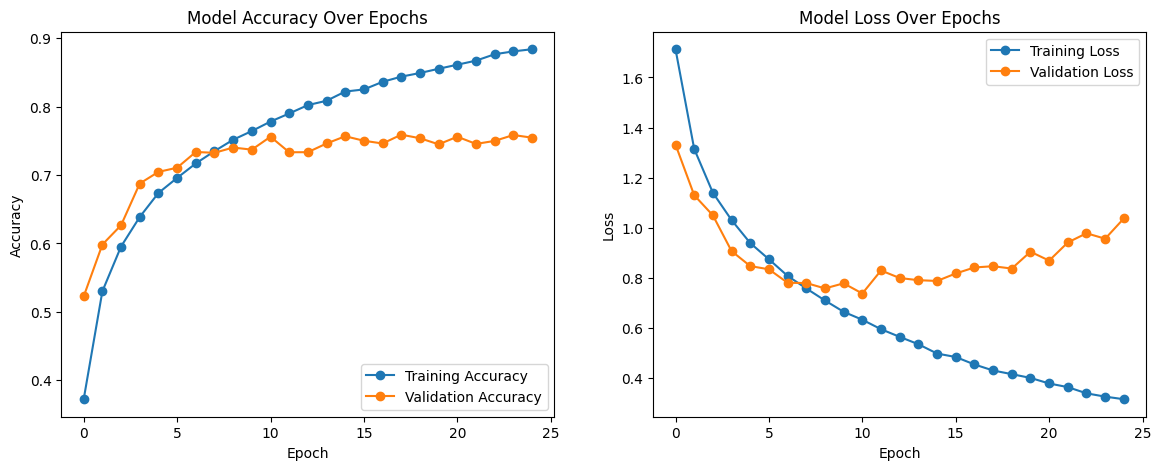

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

In [16]:
# Save the model to disk
model_save_path = 'cnn_cifar10_model.h5'
cnn_model.save(model_save_path)
print(f"Model saved to {model_save_path}")

# Load the model from disk
loaded_model = tf.keras.models.load_model(model_save_path)
print("Model loaded successfully.")

# Verify loaded model performance
loaded_test_loss, loaded_test_accuracy = loaded_model.evaluate(test_images, test_labels, verbose=2)
print(f"Loaded Model Test Accuracy: {loaded_test_accuracy * 100:.2f}%")

Model saved to cnn_cifar10_model.h5
Model loaded successfully.
313/313 - 1s - 4ms/step - accuracy: 0.7415 - loss: 1.0699
Loaded Model Test Accuracy: 74.15%
